In [1]:
cd ~

/home/kenan


In [2]:
cd Desktop/Metis_DS_BC_2022/MetisBC/Exploratory Data Analysis/Project_Turnstile_data

/home/kenan/Desktop/Metis_DS_BC_2022/MetisBC/Exploratory Data Analysis/Project_Turnstile_data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from functools import partial, reduce

In [6]:
df_19_12 = pd.read_csv('/home/kenan/Desktop/Metis_DS_BC_2022/MetisBC/Exploratory Data Analysis/Project_Turnstile_data/2019_12_clean.csv')

df_21_12 = pd.read_csv('/home/kenan/Desktop/Metis_DS_BC_2022/MetisBC/Exploratory Data Analysis/Project_Turnstile_data/2021_12_clean.csv')



In [7]:
df_19_12

,STATION,DATE_TIME,DOW,DAILY_VOLUME,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,ENTRIES,EXITS,DATE,TIME,C/A,UNIT,SCP
0,59 ST,2019-11-30 07:00:00,Saturday,27.0,10.0,17.0,7290785.0,2470635.0,7290795,2470652,11/30/2019,07:00:00,A002,R051,02-00-00
1,59 ST,2019-11-30 11:00:00,Saturday,146.0,65.0,81.0,7290795.0,2470652.0,7290860,2470733,11/30/2019,11:00:00,A002,R051,02-00-00
2,59 ST,2019-11-30 15:00:00,Saturday,266.0,191.0,75.0,7290860.0,2470733.0,7291051,2470808,11/30/2019,15:00:00,A002,R051,02-00-00
3,59 ST,2019-11-30 19:00:00,Saturday,399.0,345.0,54.0,7291051.0,2470808.0,7291396,2470862,11/30/2019,19:00:00,A002,R051,02-00-00
4,59 ST,2019-11-30 23:00:00,Saturday,237.0,201.0,36.0,7291396.0,2470862.0,7291597,2470898,11/30/2019,23:00:00,A002,R051,02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805215,RIT-ROOSEVELT,2019-12-27 04:00:00,Friday,0.0,0.0,0.0,5554.0,420.0,5554,420,12/27/2019,04:00:00,TRAM2,R469,00-05-01
805216,RIT-ROOSEVELT,2019-12-27 08:00:00,Friday,0.0,0.0,0.0,5554.0,420.0,5554,420,12/27/2019,08:00:00,TRAM2,R469,00-05-01
805217,RIT-ROOSEVELT,2019-12-27 12:00:00,Friday,0.0,0.0,0.0,5554.0,420.0,5554,420,12/27/2019,12:00:00,TRAM2,R469,00-05-01
805218,RIT-ROOSEVELT,2019-12-27 16:00:00,Friday,0.0,0.0,0.0,5554.0,420.0,5554,420,12/27/2019,16:00:00,TRAM2,R469,00-05-01


In [122]:
df_21_12_stations_volume = df_21_12.groupby(['STATION'])['DAILY_VOLUME'].sum().sort_values(ascending = False)
df_21_12_stations_volume = pd.DataFrame(df_21_12_stations_volume.reset_index())
df_21_12_stations_volume = df_21_12_stations_volume.rename(columns={"DAILY_VOLUME":"MV_21_12"})
df_21_12_stations_volume = df_21_12_stations_volume.head(15)
df_21_12_stations_volume

,STATION,MV_21_12
0,34 ST-PENN STA,2928322.0
1,23 ST,1962725.0
2,GRD CNTRL-42 ST,1789320.0
3,34 ST-HERALD SQ,1780447.0
4,FULTON ST,1739528.0
5,TIMES SQ-42 ST,1699037.0
6,86 ST,1675082.0
7,125 ST,1589758.0
8,42 ST-PORT AUTH,1556598.0
9,59 ST,1465439.0


In [123]:
df_19_12_stations_volume = df_19_12.groupby(['STATION'])['DAILY_VOLUME'].sum().sort_values(ascending = False)
df_19_12_stations_volume = pd.DataFrame(df_19_12_stations_volume.reset_index())
df_19_12_stations_volume = df_19_12_stations_volume.rename(columns={"DAILY_VOLUME":"MV_19_12"})
df_19_12_stations_volume = df_19_12_stations_volume.head(15)
df_19_12_stations_volume

,STATION,MV_19_12
0,34 ST-PENN STA,6421292.0
1,23 ST,4224369.0
2,34 ST-HERALD SQ,4019328.0
3,GRD CNTRL-42 ST,3723680.0
4,TIMES SQ-42 ST,3723501.0
5,FULTON ST,3588840.0
6,42 ST-PORT AUTH,3528738.0
7,86 ST,3419469.0
8,125 ST,3247363.0
9,14 ST-UNION SQ,3202708.0


In [33]:
top_15_station_of_19_12_list = df_19_12_stations_volume['STATION'].to_list()
top_15_station_of_19_12_list


['34 ST-PENN STA',
 '23 ST',
 '34 ST-HERALD SQ',
 'GRD CNTRL-42 ST',
 'TIMES SQ-42 ST',
 'FULTON ST',
 '42 ST-PORT AUTH',
 '86 ST',
 '125 ST',
 '14 ST-UNION SQ',
 'CANAL ST',
 '14 ST',
 '59 ST',
 '59 ST COLUMBUS',
 'FLUSHING-MAIN']

In [34]:
top_15_station_of_21_12_list = df_21_12_stations_volume['STATION'].to_list()
top_15_station_of_21_12_list


['34 ST-PENN STA',
 '23 ST',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 'FULTON ST',
 'TIMES SQ-42 ST',
 '86 ST',
 '125 ST',
 '42 ST-PORT AUTH',
 '59 ST',
 '14 ST-UNION SQ',
 'CANAL ST',
 '14 ST',
 '96 ST',
 '59 ST COLUMBUS']

In [126]:

top_stations_19_12 = df_19_12[df_19_12['STATION'].isin(top_15_station_of_19_12_list)]
top_stations_19_12 = top_stations_19_12.groupby(by=['STATION', 'DOW'], as_index=False).sum()[['STATION', 'DOW','DAILY_VOLUME']]
top_stations_19_12 


,STATION,DOW,DAILY_VOLUME
0,125 ST,Friday,539640.0
1,125 ST,Monday,516985.0
2,125 ST,Saturday,370413.0
3,125 ST,Sunday,315569.0
4,125 ST,Thursday,519788.0
...,...,...,...
100,TIMES SQ-42 ST,Saturday,490059.0
101,TIMES SQ-42 ST,Sunday,410106.0
102,TIMES SQ-42 ST,Thursday,572995.0
103,TIMES SQ-42 ST,Tuesday,553497.0


In [45]:
top_station_volume_19_12 = top_stations_19_12.groupby(by=['STATION']).sum()

In [47]:
top_station_volume_19_12 = top_station_volume_19_12.sort_values(by=['DAILY_VOLUME'],ascending= False)
top_station_volume_19_12

,DAILY_VOLUME
STATION,
34 ST-PENN STA,6421292.0
23 ST,4224369.0
34 ST-HERALD SQ,4019328.0
GRD CNTRL-42 ST,3723680.0
TIMES SQ-42 ST,3723501.0
FULTON ST,3588840.0
42 ST-PORT AUTH,3528738.0
86 ST,3419469.0
125 ST,3247363.0


In [48]:
top_5_station_volume_19_12 = top_station_volume_19_12.head(5)

In [49]:
top_5_station_volume_19_12

,DAILY_VOLUME
STATION,
34 ST-PENN STA,6421292.0
23 ST,4224369.0
34 ST-HERALD SQ,4019328.0
GRD CNTRL-42 ST,3723680.0
TIMES SQ-42 ST,3723501.0


In [52]:
top_5_station_volume_19_12.columns

Index(['DAILY_VOLUME'], dtype='object')

In [57]:
top_5_list_19_12 = top_5_station_volume_19_12.index.to_list()

In [60]:
top_5_list_19_12

['34 ST-PENN STA',
 '23 ST',
 '34 ST-HERALD SQ',
 'GRD CNTRL-42 ST',
 'TIMES SQ-42 ST']

In [140]:
df_19_12_top_5 = df_19_12[df_19_12['STATION'].isin(top_5_list_19_12)]
df_19_12_top_5 = df_19_12_top_5.groupby(by=['STATION','DOW'], as_index=False).sum()[['STATION','DOW','DAILY_VOLUME']]
#df_19_12_top_5

df_df_19_12_top_5 = pd.DataFrame(df_19_12_top_5)
df_df_19_12_top_5

,STATION,DOW,DAILY_VOLUME
0,23 ST,Friday,710863.0
1,23 ST,Monday,690749.0
2,23 ST,Saturday,462969.0
3,23 ST,Sunday,358291.0
4,23 ST,Thursday,698804.0
5,23 ST,Tuesday,686398.0
6,23 ST,Wednesday,616295.0
7,34 ST-HERALD SQ,Friday,637344.0
8,34 ST-HERALD SQ,Monday,579957.0
9,34 ST-HERALD SQ,Saturday,553143.0


In [148]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [149]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(1,len(sorter)+1)))
sorterIndex

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [150]:
df_df_19_12_top_5_copy = df_df_19_12_top_5.copy(deep=True)

In [151]:
df_df_19_12_top_5['Day_id'] = df_df_19_12_top_5['DOW'].map(sorterIndex)
df_df_19_12_top_5 = df_df_19_12_top_5.sort_values(['STATION','Day_id'],ascending=[False,True])
df_df_19_12_top_5

,STATION,DOW,DAILY_VOLUME,Day_id
29,TIMES SQ-42 ST,Monday,566797.0,1
33,TIMES SQ-42 ST,Tuesday,553497.0,2
34,TIMES SQ-42 ST,Wednesday,530560.0,3
32,TIMES SQ-42 ST,Thursday,572995.0,4
28,TIMES SQ-42 ST,Friday,599487.0,5
30,TIMES SQ-42 ST,Saturday,490059.0,6
31,TIMES SQ-42 ST,Sunday,410106.0,7
22,GRD CNTRL-42 ST,Monday,567669.0,1
26,GRD CNTRL-42 ST,Tuesday,576739.0,2
27,GRD CNTRL-42 ST,Wednesday,524912.0,3


/home/kenan/anaconda3/envs/metis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Volume flow by days of 2019 DEC')

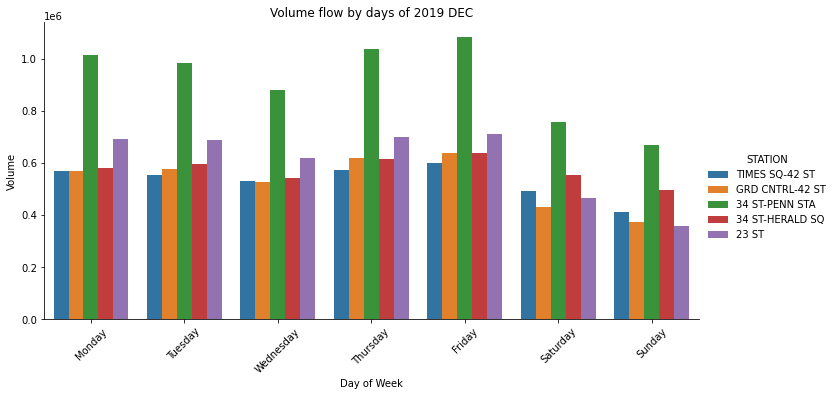

In [152]:

weekday_bar = sns.catplot('DOW', 'DAILY_VOLUME', hue ='STATION', kind = 'bar', data = df_df_19_12_top_5, aspect = 2)
plt.xticks(rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Volume')
plt.title('Volume flow by days of 2019 DEC')

# plt.savefig("weekday_+traffic.png")

In [127]:

top_stations_21_12 = df_21_12[df_21_12['STATION'].isin(top_15_station_of_21_12_list)]
top_stations_21_12 = top_stations_21_12.groupby(by=['STATION', 'DOW'], as_index=False).sum()[['STATION', 'DOW','DAILY_VOLUME']]
top_stations_21_12

,STATION,DOW,DAILY_VOLUME
0,125 ST,Friday,239584.0
1,125 ST,Monday,242794.0
2,125 ST,Saturday,194765.0
3,125 ST,Sunday,176461.0
4,125 ST,Thursday,246863.0
...,...,...,...
100,TIMES SQ-42 ST,Saturday,226579.0
101,TIMES SQ-42 ST,Sunday,214211.0
102,TIMES SQ-42 ST,Thursday,257624.0
103,TIMES SQ-42 ST,Tuesday,251354.0


In [130]:
top_station_volume_21_12 = top_stations_21_12.groupby(by=['STATION']).sum()
top_station_volume_21_12 = top_station_volume_21_12.sort_values(by=['DAILY_VOLUME'],ascending= False)
top_station_volume_21_12

,DAILY_VOLUME
STATION,
34 ST-PENN STA,2928322.0
23 ST,1962725.0
GRD CNTRL-42 ST,1789320.0
34 ST-HERALD SQ,1780447.0
FULTON ST,1739528.0
TIMES SQ-42 ST,1699037.0
86 ST,1675082.0
125 ST,1589758.0
42 ST-PORT AUTH,1556598.0


In [132]:
top_5_station_volume_21_12 = top_station_volume_21_12.head(5)
top_5_station_volume_21_12


,DAILY_VOLUME
STATION,
34 ST-PENN STA,2928322.0
23 ST,1962725.0
GRD CNTRL-42 ST,1789320.0
34 ST-HERALD SQ,1780447.0
FULTON ST,1739528.0


In [134]:
top_5_list_21_12 = top_5_station_volume_21_12.index.to_list()

In [141]:
df_21_12_top_5 = df_21_12[df_21_12['STATION'].isin(top_5_list_21_12)]
df_21_12_top_5 = df_21_12_top_5.groupby(by=['STATION','DOW'], as_index=False).sum()[['STATION','DOW','DAILY_VOLUME']]
# df_21_12_top_5 

df_df_21_12_top_5 = pd.DataFrame(df_21_12_top_5)
df_df_21_12_top_5

,STATION,DOW,DAILY_VOLUME
0,23 ST,Friday,280747.0
1,23 ST,Monday,305534.0
2,23 ST,Saturday,242597.0
3,23 ST,Sunday,192501.0
4,23 ST,Thursday,311614.0
5,23 ST,Tuesday,311921.0
6,23 ST,Wednesday,317811.0
7,34 ST-HERALD SQ,Friday,264371.0
8,34 ST-HERALD SQ,Monday,257001.0
9,34 ST-HERALD SQ,Saturday,243445.0


In [142]:
df_df_21_12_top_5_copy = df_df_21_12_top_5.copy(deep=True)

In [143]:
df_df_21_12_top_5['Day_id'] = df_df_21_12_top_5['DOW'].map(sorterIndex)
df_df_21_12_top_5 = df_df_21_12_top_5.sort_values(['STATION','Day_id'],ascending=[False,True])
df_df_21_12_top_5

,STATION,DOW,DAILY_VOLUME,Day_id
29,GRD CNTRL-42 ST,Monday,275672.0,1
33,GRD CNTRL-42 ST,Tuesday,276041.0,2
34,GRD CNTRL-42 ST,Wednesday,279233.0,3
32,GRD CNTRL-42 ST,Thursday,279401.0,4
28,GRD CNTRL-42 ST,Friday,271366.0,5
30,GRD CNTRL-42 ST,Saturday,218787.0,6
31,GRD CNTRL-42 ST,Sunday,188820.0,7
22,FULTON ST,Monday,283499.0,1
26,FULTON ST,Tuesday,283120.0,2
27,FULTON ST,Wednesday,284879.0,3


/home/kenan/anaconda3/envs/metis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Volume flow by days of 2021 DEC')

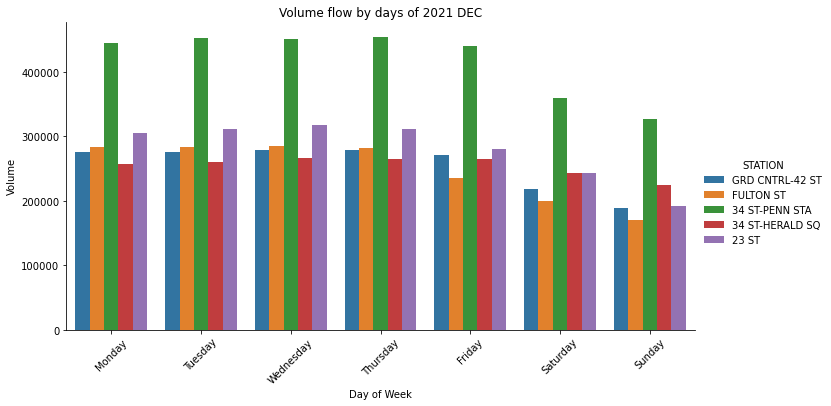

In [144]:

weekday_bar = sns.catplot('DOW', 'DAILY_VOLUME', hue ='STATION', kind = 'bar', data = df_df_21_12_top_5, aspect = 2)
plt.xticks(rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Volume')
plt.title('Volume flow by days of 2021 DEC')

# plt.savefig("weekday_+traffic.png")

/home/kenan/anaconda3/envs/metis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Volume flow by days of 2019 DEC')

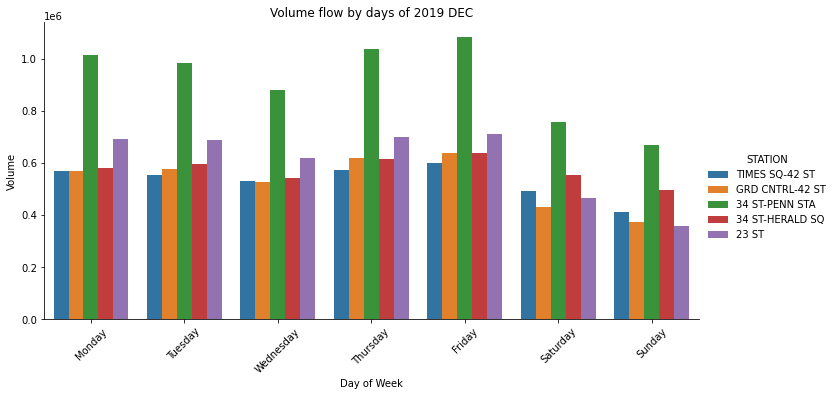

In [153]:

weekday_bar = sns.catplot('DOW', 'DAILY_VOLUME', hue ='STATION', kind = 'bar', data = df_df_19_12_top_5, aspect = 2)
plt.xticks(rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Volume')
plt.title('Volume flow by days of 2019 DEC')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [154]:
df_19_12

,STATION,DATE_TIME,DOW,DAILY_VOLUME,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,ENTRIES,EXITS,DATE,TIME,C/A,UNIT,SCP
0,59 ST,2019-11-30 07:00:00,Saturday,27.0,10.0,17.0,7290785.0,2470635.0,7290795,2470652,11/30/2019,07:00:00,A002,R051,02-00-00
1,59 ST,2019-11-30 11:00:00,Saturday,146.0,65.0,81.0,7290795.0,2470652.0,7290860,2470733,11/30/2019,11:00:00,A002,R051,02-00-00
2,59 ST,2019-11-30 15:00:00,Saturday,266.0,191.0,75.0,7290860.0,2470733.0,7291051,2470808,11/30/2019,15:00:00,A002,R051,02-00-00
3,59 ST,2019-11-30 19:00:00,Saturday,399.0,345.0,54.0,7291051.0,2470808.0,7291396,2470862,11/30/2019,19:00:00,A002,R051,02-00-00
4,59 ST,2019-11-30 23:00:00,Saturday,237.0,201.0,36.0,7291396.0,2470862.0,7291597,2470898,11/30/2019,23:00:00,A002,R051,02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805215,RIT-ROOSEVELT,2019-12-27 04:00:00,Friday,0.0,0.0,0.0,5554.0,420.0,5554,420,12/27/2019,04:00:00,TRAM2,R469,00-05-01
805216,RIT-ROOSEVELT,2019-12-27 08:00:00,Friday,0.0,0.0,0.0,5554.0,420.0,5554,420,12/27/2019,08:00:00,TRAM2,R469,00-05-01
805217,RIT-ROOSEVELT,2019-12-27 12:00:00,Friday,0.0,0.0,0.0,5554.0,420.0,5554,420,12/27/2019,12:00:00,TRAM2,R469,00-05-01
805218,RIT-ROOSEVELT,2019-12-27 16:00:00,Friday,0.0,0.0,0.0,5554.0,420.0,5554,420,12/27/2019,16:00:00,TRAM2,R469,00-05-01


In [159]:
dist_19_12 = df_19_12.groupby(['STATION','DOW'],as_index=False).sum()[['STATION','DAILY_VOLUME']]
dist_19_12.head()

,STATION,DAILY_VOLUME
0,1 AV,105278.0
1,1 AV,100663.0
2,1 AV,58653.0
3,1 AV,44300.0
4,1 AV,99727.0


/home/kenan/anaconda3/envs/metis/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAILY_VOLUME', ylabel='Density'>

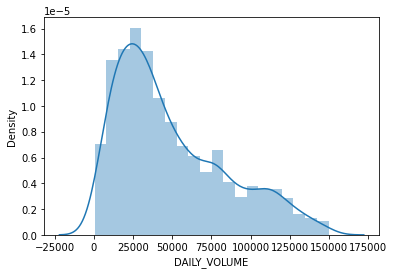

In [166]:
sns.distplot(dist_19_12['DAILY_VOLUME'][dist_19_12['DAILY_VOLUME'] < 150000])

In [164]:
dist_21_12 = df_21_12.groupby(['STATION','DOW'],as_index=False).sum()[['STATION','DAILY_VOLUME']]
dist_21_12.head()

,STATION,DAILY_VOLUME
0,1 AV,71261.0
1,1 AV,73971.0
2,1 AV,71285.0
3,1 AV,62259.0
4,1 AV,75400.0


/home/kenan/anaconda3/envs/metis/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAILY_VOLUME', ylabel='Density'>

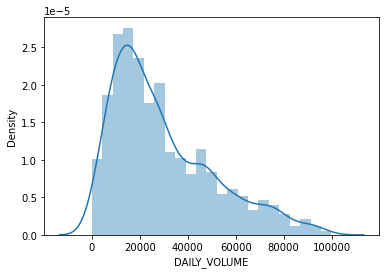

In [165]:
sns.distplot(dist_21_12['DAILY_VOLUME'][dist_21_12['DAILY_VOLUME'] < 100000])